# ML1 - 1.4 Supervised Learning Algorithms Part 1

### This script contains the following:

#### 1. Import Libraries
#### 2. Data Exploring
#### 3. K-Nearest Neighbor
        Test/Training chart
        Confusion matrix
        Cleaning
        Repeat First KNN and Confusion Matrix
#### 4. K-Nearest Neighbor Second Attempt
        Test/Training chart
        Confusion matrix
#### 5. K-Nearest Neighbor Third Attempt
        Test/Training chart
        Confusion matrix
### 6. K-Nearest Neighbor Fourth Attempt
        Test/Training chart
        Confusion matrix
#### 7. Export

### 1. Import Libraries

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [5]:
# Importing scaled ClimateWins data with original DATE column

climatewins_scaled = pd.read_pickle(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 1 - Basics of Machine Learning for Analysts\ClimateWins\Prepared Python Files\ML1_1.3_scaled_og_DATE_column.pkl')

In [6]:
# Creating Path for export

path = (r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 1 - Basics of Machine Learning for Analysts')

In [7]:
path

'D:\\Career Foundry\\3) Data Specialization\\Machine Learning with Python\\Achievement 1 - Basics of Machine Learning for Analysts'

In [8]:
# Importing Pleasant Weather data set

pleasant_weather = pd.read_csv(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 1 - Basics of Machine Learning for Analysts\ClimateWins\DataSet\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

### 2. Data Exploring

In [10]:
climatewins_scaled

DATE     MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
0      19600101 -1.599964           0.660514          -0.02793   
1      19600102 -1.599964           0.244897          -0.02793   
2      19600103 -1.599964           1.076130          -0.02793   
3      19600104 -1.599964          -1.001953          -0.02793   
4      19600105 -1.599964           0.244897          -0.02793   
...         ...       ...                ...               ...   
22945  20221027  1.013583          -1.833187          -0.02793   
22946  20221028  1.013583           0.244897          -0.02793   
22947  20221029  1.013583          -0.586336          -0.02793   
22948  20221030  1.013583          -0.170720          -0.02793   
22949  20221031  1.013583          -0.170720          -0.02793   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0            0.826097       -0.001949               -1.101066   
1            0.735760       -0.001949               -1.058108   
2            1.277781       -0.001949               -1.251420   
3            1.458455       -0.001949               -0.821838   
4            1.729466       -0.001949               -0.746661   
...               ...             ...                     ...   
22945        0.284075        1.037367               -0.005632   
22946        0.103401        0.976231               -0.005632   
22947        0.013064        0.716402               -0.005632   
22948        0.374412        0.487141               -0.005632   
22949        0.735760        0.196744               -0.005632   

       BASEL_precipitation  BASEL_snow_depth  BASEL_sunshine  ...  \
0                -0.265148         -0.179228       -0.902918  ...   
1                 1.658760         -0.179228       -0.810126  ...   
2                 0.155707         -0.179228       -1.065304  ...   
3                -0.445514         -0.179228       -0.114186  ...   
4                -0.164944         -0.179228        0.187388  ...   
...                    ...               ...             ...  ...   
22945            -0.004619         -0.179228        0.720943  ...   
22946            -0.004619         -0.179228        0.187388  ...   
22947            -0.004619         -0.179228        0.349774  ...   
22948            -0.004619         -0.179228        0.280180  ...   
22949            -0.004619         -0.179228       -0.322968  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                 -0.443701           0.761754          -1.299744   
1                  0.783085           1.183580          -1.262455   
2                  0.783085           1.183580          -0.432779   
3                  0.783085           0.480538           0.387574   
4                 -1.670486          -0.363113           1.729970   
...                     ...                ...                ...   
22945             -0.443701          -0.081896          -0.003958   
22946             -0.443701          -0.081896          -0.003958   
22947             -0.443701          -0.081896          -0.003958   
22948             -0.443701          -0.081896          -0.003958   
22949             -0.443701          -0.081896          -0.003958   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
0                      -0.806427               -0.088407            -0.024706   
1                      -1.042055                0.503361            -0.024706   
2                      -1.136306               -0.396127            -0.024706   
3                      -1.183432                0.669056            -0.024706   
4                      -0.794645               -0.490810            -0.024706   
...                          ...                     ...                  ...   
22945                  -0.005290               -0.005560            -0.024706   
22946                  -0.005290               -0.005560            -0.024706   
22947                  -0.005290               -0.

In [11]:
climatewins_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 170 entries, DATE to VALENTIA_temp_max
dtypes: float64(169), int64(1)
memory usage: 29.8 MB


In [12]:
column_names = climatewins_scaled.columns.tolist()

In [13]:
column_names

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [14]:
climatewins_scaled.shape

(22950, 170)

In [15]:
column_names_pw = pleasant_weather.columns.tolist()

In [16]:
column_names_pw

['DATE',
 'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']

In [17]:
pleasant_weather.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [18]:
pleasant_weather.shape

(22950, 16)

#### Training and Testing chart

In [20]:
# Full Merge of climatewins_sd and pleasant_w to perform train/test split.

cp_merged = pd.merge(climatewins_scaled, pleasant_weather, on='DATE', how='outer')

In [21]:
cp_merged.head()

DATE     MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101 -1.599964           0.660514          -0.02793        0.826097   
1  19600102 -1.599964           0.244897          -0.02793        0.735760   
2  19600103 -1.599964           1.076130          -0.02793        1.277781   
3  19600104 -1.599964          -1.001953          -0.02793        1.458455   
4  19600105 -1.599964           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  HEATHROW_pleasant_weather  \
0         -0.179228       -0.902918  ...                          0   
1         -0.179228       -0.810126  ...                          0   
2         -0.179228       -1.065304  ...                          0   
3         -0.179228       -0.114186  ...                          0   
4         -0.179228        0.187388  ...                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 185 columns]

In [22]:
column_names_merged = cp_merged.columns.tolist()

In [23]:
column_names_merged

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [24]:
cp_merged.shape

(22950, 185)

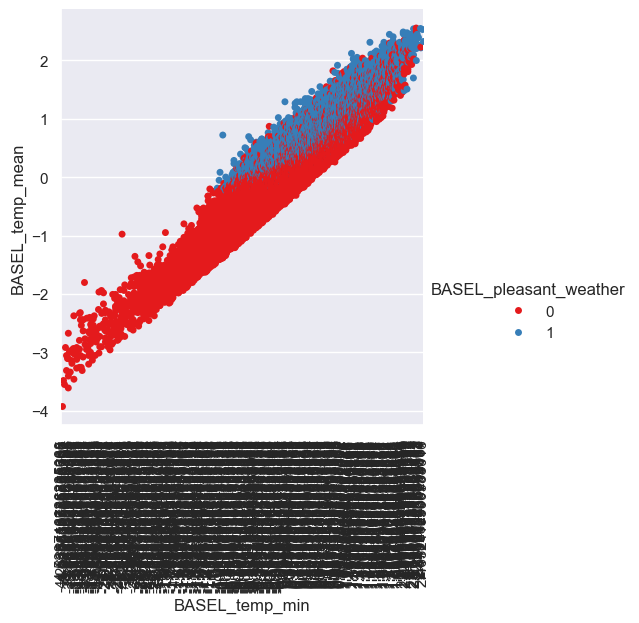

In [25]:
# Test/Train Split
# We'll use the Test/Train split code with the climatewins and pleasant_w datasets to create a scatterplot and a pairplot to see how they work together
# looking at minimum and mean temperature in BASEL along with BASEl pleasant weather where 1 indicates pleasant weather and 0 indicates not pleasant
# weather.

sns.set_theme()
g = sns.catplot(x="BASEL_temp_min", y="BASEL_temp_mean", hue="BASEL_pleasant_weather", palette='Set1', data=cp_merged)
g.set_xticklabels(rotation=90)
plt.savefig("Test and Train - BASEL min_mean_temp_and_pleasant_weather ML1 1.4.png")

###### INTERPRETATION: This scatterplot shows that there are more days with unpleasant weather, represented by the '0' or 'red' coloration, than there are pleaseant days, represented by '1' or 'blue' coloration.

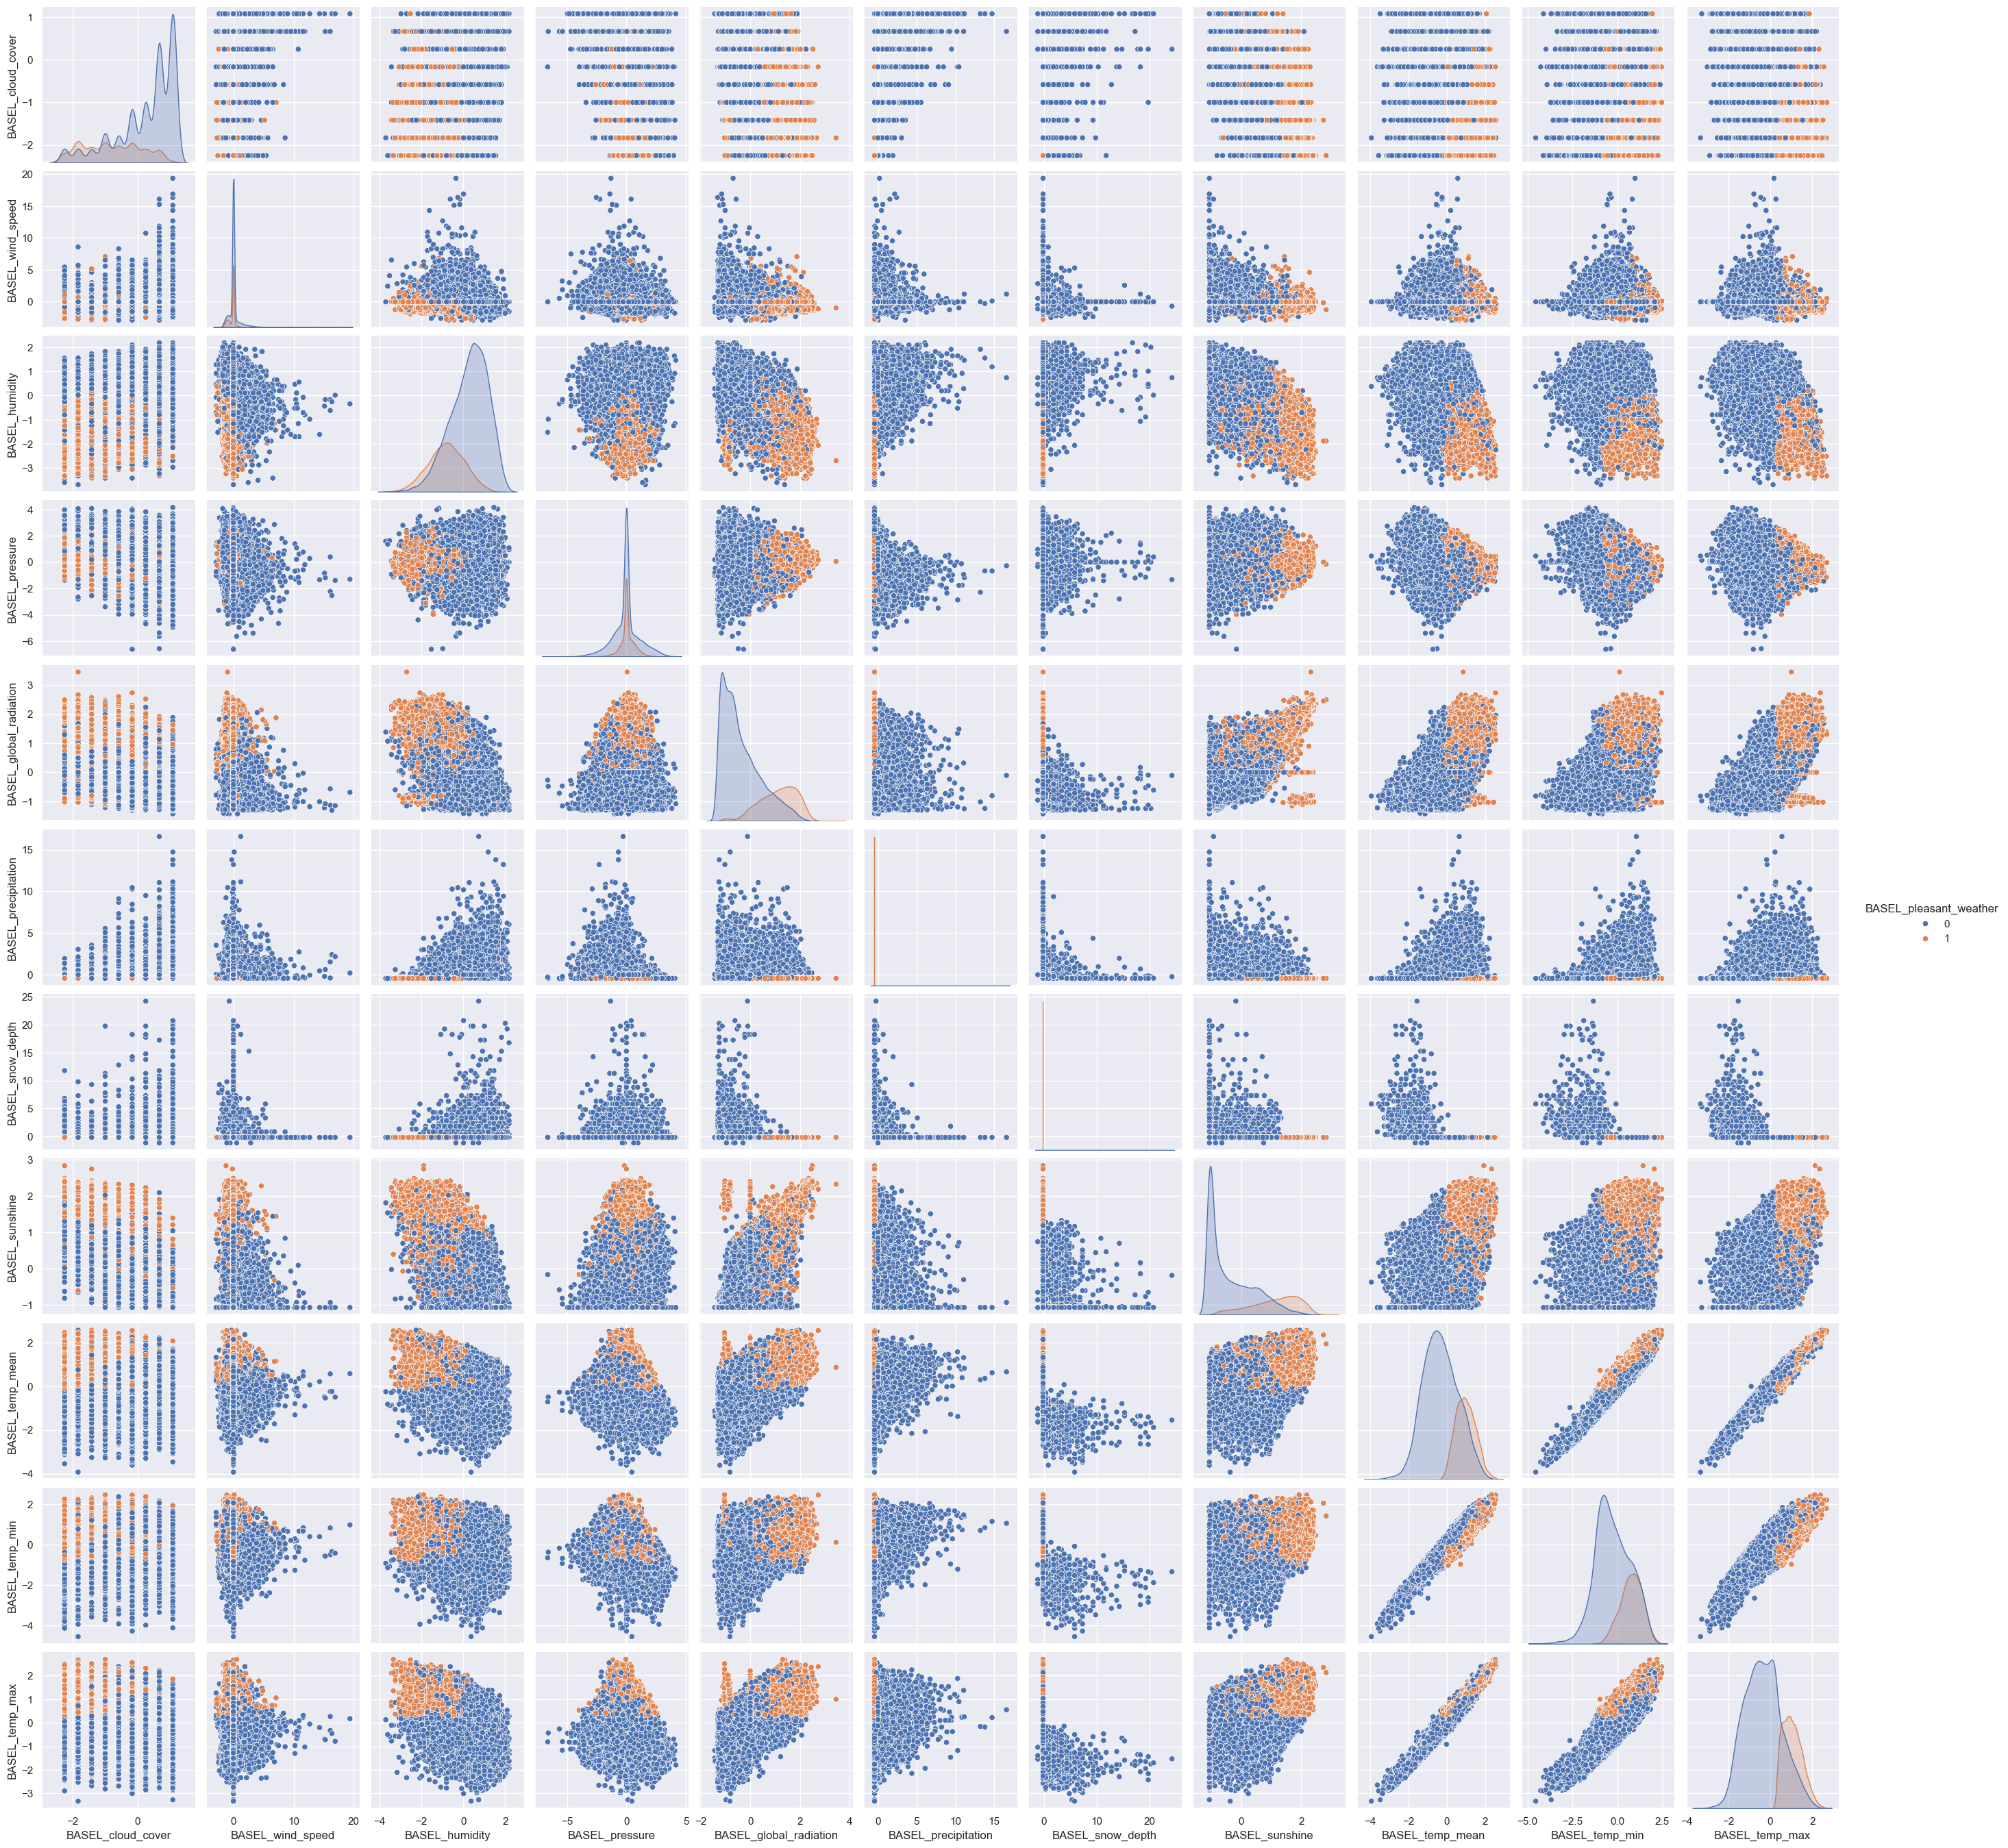

In [27]:
# Reducine the pair plot to BASEL only. The larger the pair plot data the more time and memory it takes to run the code.

sns.pairplot(cp_merged[['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BASEL_pleasant_weather']], hue = 'BASEL_pleasant_weather')
plt.savefig("PairPlot BASEL_columns and BASEL_pleasant_weather ML1 1.4.png")
plt.show()

###### The cp_merged dataset was only used to perform the scatterplot and the pairplot. It is not used in the remainder of this script.

###### Exploring the pleasant_weather data set I discovered that there are weather stations missing: GDANSK, ROMA, or TOURS. These three weather stations and 'DATE', 'MONTH' will be dropped from the climatewins_scaled dataset.

In [30]:
# Dropping GDANSK, ROMA, and TOURS columns from ClimateWins

climatewins_sd= climatewins_scaled.drop(columns =['DATE', 'MONTH','GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'])

In [31]:
climatewins_sd.shape

(22950, 147)

In [32]:
climatewins_sd.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0           0.660514          -0.02793        0.826097       -0.001949   
1           0.244897          -0.02793        0.735760       -0.001949   
2           1.076130          -0.02793        1.277781       -0.001949   
3          -1.001953          -0.02793        1.458455       -0.001949   
4           0.244897          -0.02793        1.729466       -0.001949   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0               -1.101066            -0.265148         -0.179228   
1               -1.058108             1.658760         -0.179228   
2               -1.251420             0.155707         -0.179228   
3               -0.821838            -0.445514         -0.179228   
4               -0.746661            -0.164944         -0.179228   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_cloud_cover  \
0       -0.902918        -0.528623       -0.845652  ...             -0.443701   
1       -0.810126        -0.582946       -0.462450  ...              0.783085   
2       -1.065304        -0.257010       -0.186545  ...              0.783085   
3       -0.114186        -0.555784       -0.385810  ...              0.783085   
4        0.187388        -1.003946       -1.075573  ...             -1.670486   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.761754          -1.299744                  -0.806427   
1           1.183580          -1.262455                  -1.042055   
2           1.183580          -0.432779                  -1.136306   
3           0.480538           0.387574                  -1.183432   
4          -0.363113           1.729970                  -0.794645   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.088407            -0.024706           0.372147   
1                0.503361            -0.024706          -0.829285   
2               -0.396127            -0.024706          -1.009500   
3                0.669056            -0.024706          -1.039536   
4               -0.490810            -0.024706           0.672505   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -0.668215          -0.519743          -0.752237  
1           -0.548046          -0.629054          -0.407141  
2           -0.067372           0.054135          -0.177078  
3           -0.998679          -0.164486          -0.838511  
4           -1.509396          -1.339569          -1.471186  

[5 rows x 147 columns]

In [33]:
# Dropping Date from answer dataset (weather_euro)

pleasant_w = pleasant_weather.drop(columns ='DATE')

In [34]:
pleasant_w.shape

(22950, 15)

In [35]:
pleasant_w.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

### 3. K-Nearest Neighbor


In [37]:
# Creating an 'X' matrix

X = climatewins_sd
y = pleasant_w

In [38]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [39]:
#Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
# 30/70 split. Where training is 70% and testing is 30%

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [41]:
# Run the model with neighbors equal to 1 to 5, test the accuracy

k_range = np.arange(1,5)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3 4]


C:\Users\jmesi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jmesi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\jmesi\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jmesi\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\jmesi\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

i - 1
k - [1 2 3 4]
i - 2
k - [1 2 3 4]
i - 3
k - [1 2 3 4]


<function matplotlib.pyplot.show(close=None, block=None)>

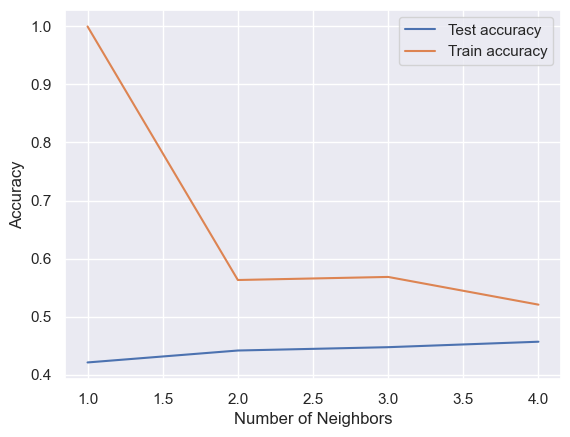

In [42]:
#plot the relationship between number of neighbors and accuracy

plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig("ML1 1.4 - Testing vs Accuracy_5KNN_a.png")
plt.show

###### INTERPRETATION: When looking at the KNN only using 5 nearest neighbors we can see that the testing accuracy is slowly rising from about 42% upward to about 47%. It's a slow build. The training accuracy immediately plummets from 100% to about 57% before leveling out and then reducing again to sit around 52%. So far there seems to be enough evidence that the model is performing poorly. We'll take a look at the confusion matrix.

#### Confusion matrix

In [45]:
locations = list({x.split("_")[0] for x in climatewins_sd.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

C:\Users\jmesi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

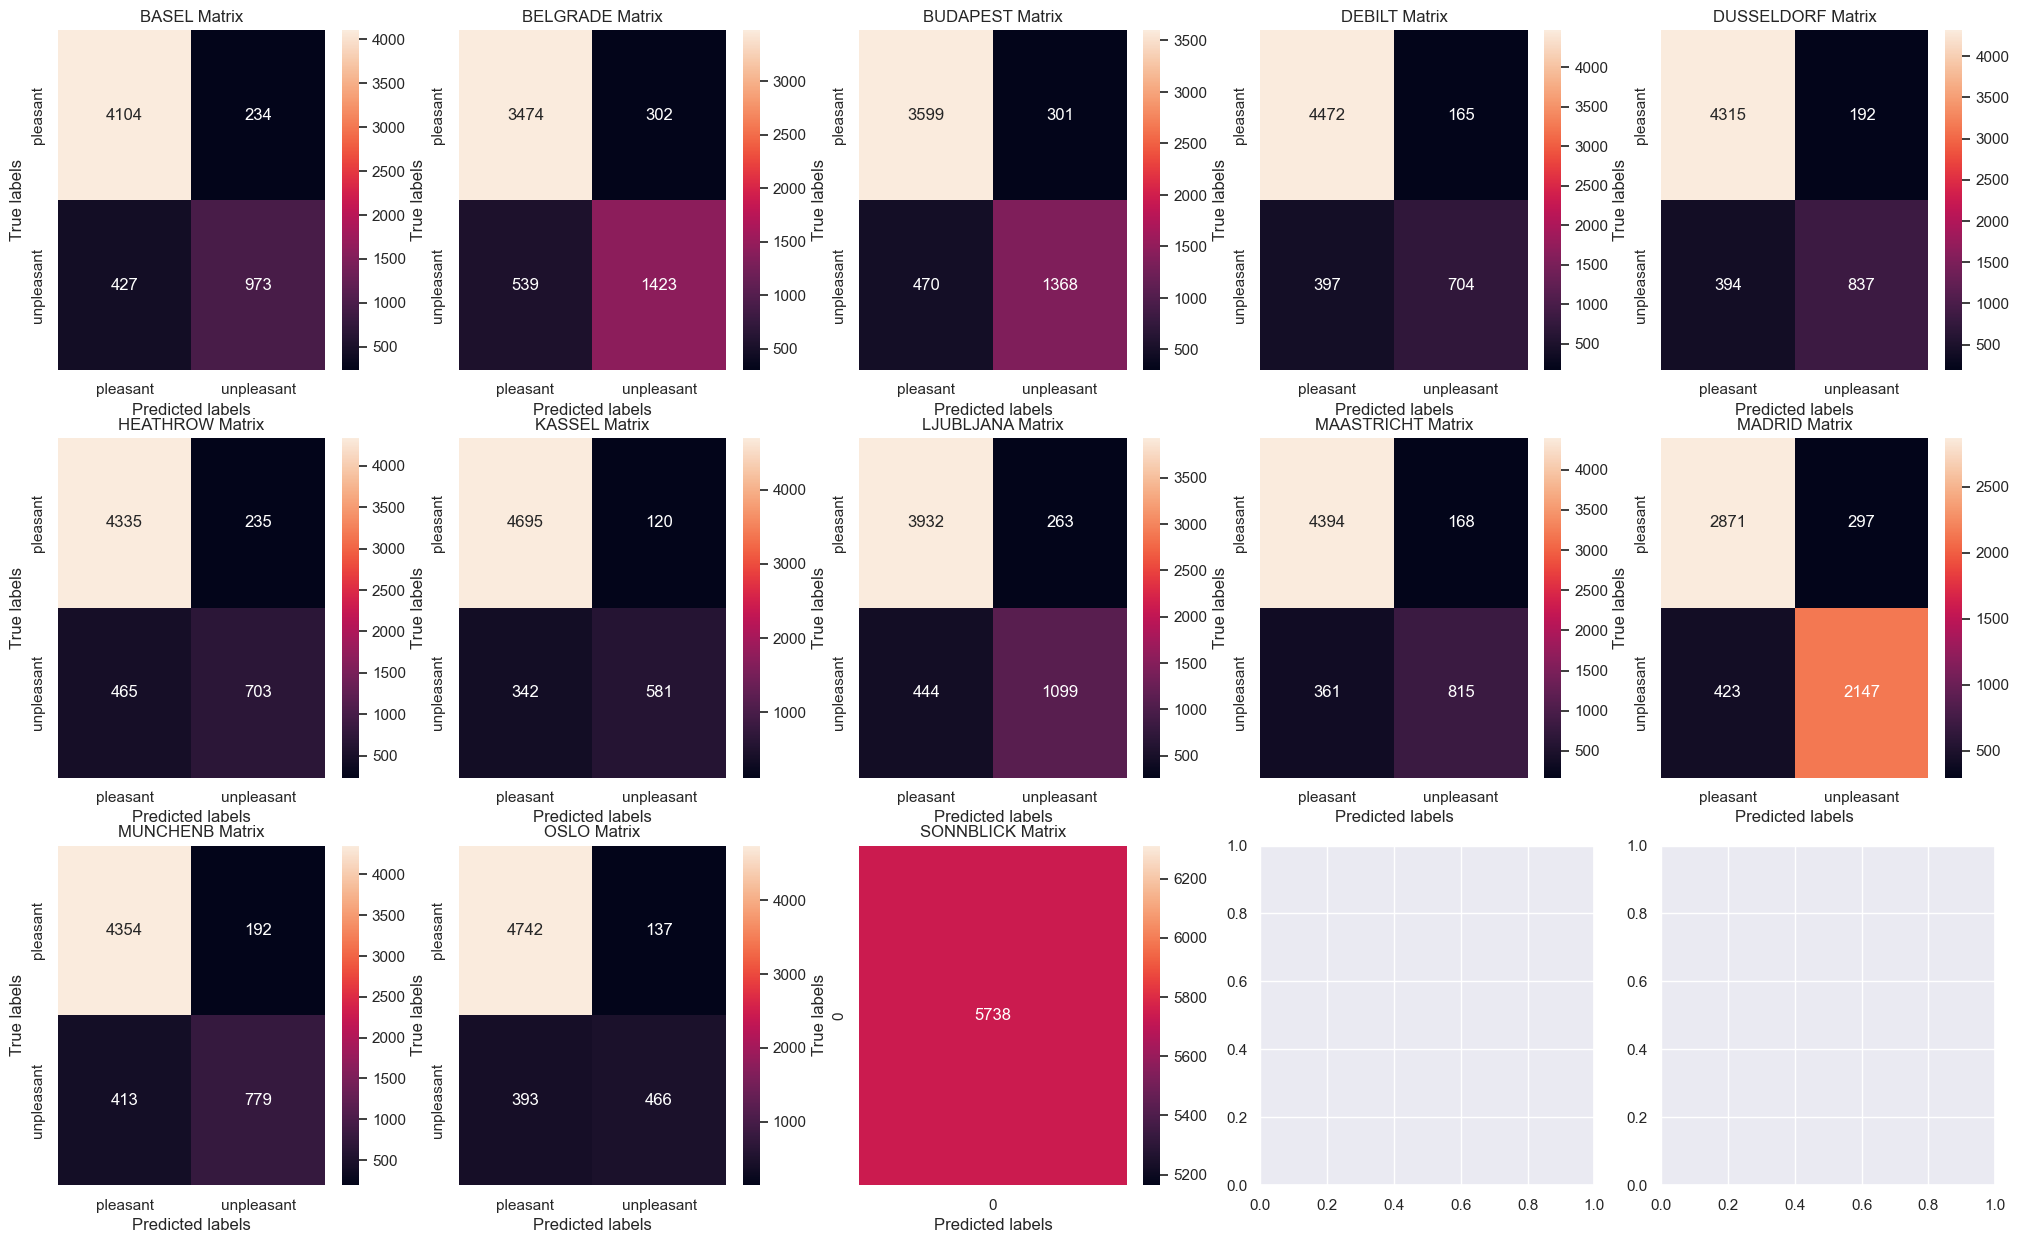

In [46]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name+' Matrix'); 
        ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.4 - Confusion Matrix_5KNN_a.png")

###### When running the confusion matrix it stops after the SONNBLICK weather data. After exploring the data in Excel, I found that SONNBLICK pleasant weather data is only represented by '0'. This disrupts the excution of the code and fails to give me the final two weather stations STOCKHOLM and VALENTIA. I will remove SONNBLICK from the climatewins_sd and pleasant_w datasets and rerun the KNN and Confusion Matrix.

##### Cleaning

In [47]:
# Dropping SONNBLICK columns from climatewins_sd that is being used in KNN.

climatewins_clean = climatewins_sd.drop(columns =['SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max'])

# Changing cliamtewins_sd to cliamtewins_clean

In [49]:
climatewins_clean.shape

(22950, 137)

In [51]:
columns_names_cc = climatewins_clean.columns.tolist()

In [53]:
columns_names_cc

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

In [55]:
# Dropping SONNBLICK columns from pleasant_w that is being used in KNN.

pleasant_clean = pleasant_w.drop(columns =['SONNBLICK_pleasant_weather'])

# Changing pleasant_w to pleasant_clean

In [57]:
pleasant_clean.shape

(22950, 14)

In [59]:
columns_names_pc = pleasant_clean.columns.tolist()

In [61]:
columns_names_pc

['BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']

#### Repeat First KNN and Confusion Matrix

In [64]:
# Creating an 'X' matrix with the new datasets since I dropped SONNBLICK weather station

X = climatewins_clean
y = pleasant_clean

In [66]:
print(X.shape)
print(y.shape)

(22950, 137)
(22950, 14)


In [68]:
#Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [70]:
# 30/70 split. Where training is 70% and testing is 30%

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 137)
(5738, 137)
(17212, 14)
(5738, 14)


In [72]:
# Run the model with neighbors equal to 1 to 5, test the accuracy

k_range = np.arange(1,5)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3 4]
i - 1
k - [1 2 3 4]
i - 2
k - [1 2 3 4]
i - 3
k - [1 2 3 4]


<function matplotlib.pyplot.show(close=None, block=None)>

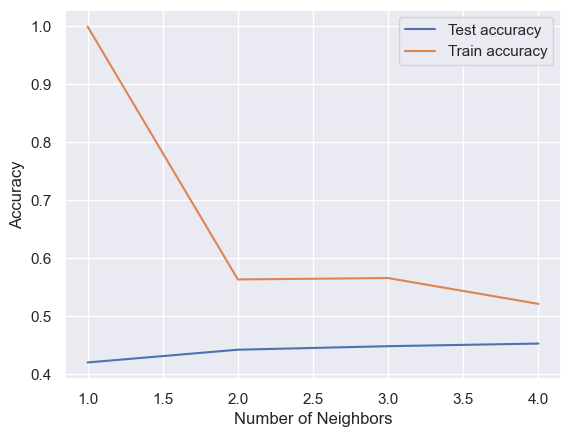

In [74]:
#plot the relationship between number of neighbors and accuracy

plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig("ML1 1.4 - Testing vs Accuracy_5KNN_b.png")
plt.show

###### Same interpretation as earlier

In [77]:
locations = list({x.split("_")[0] for x in climatewins_clean.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'STOCKHOLM',
 'VALENTIA']

IndexError: list index out of range

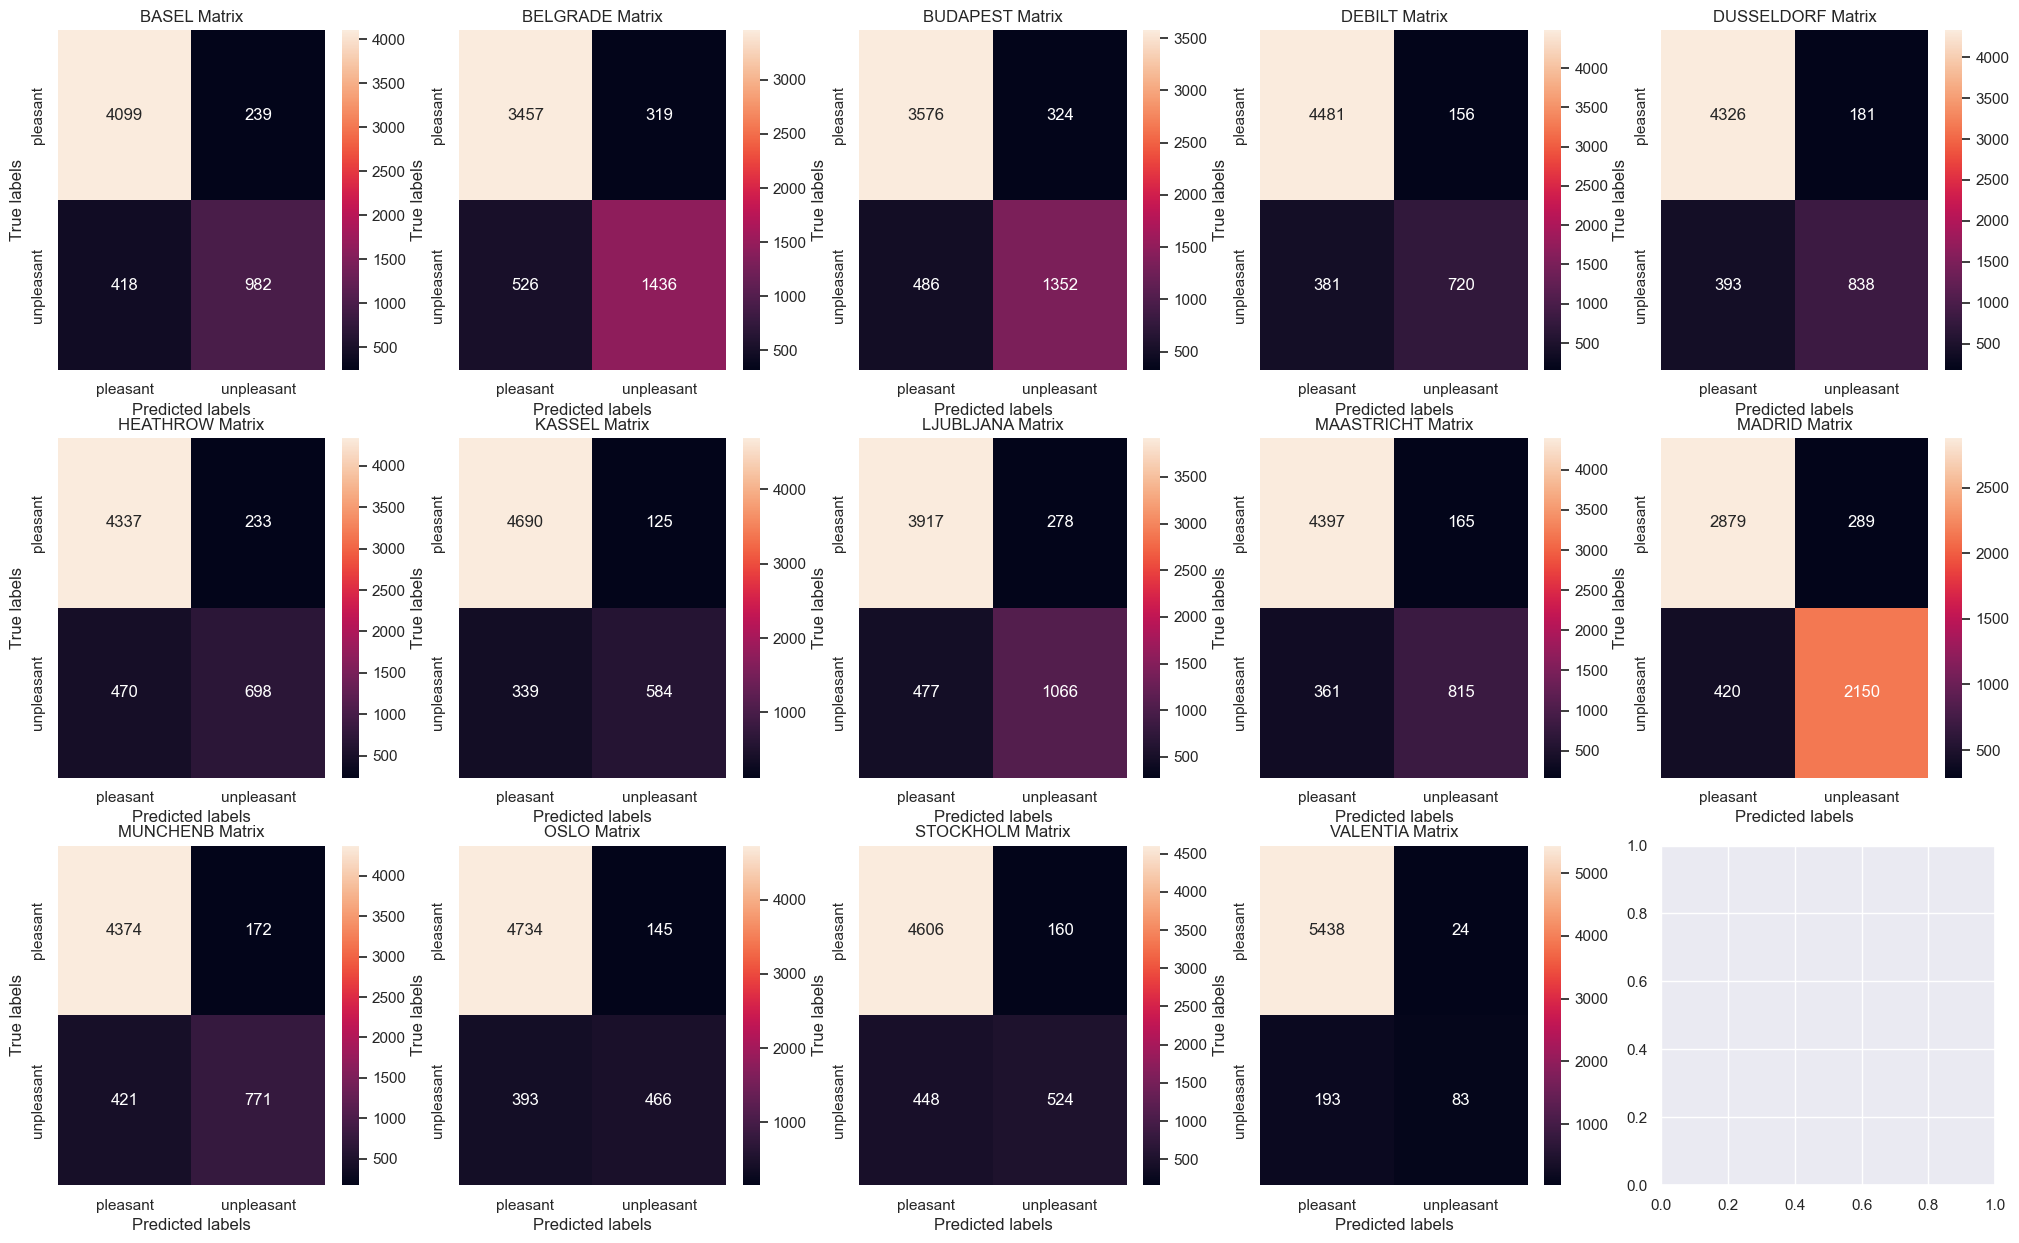

In [79]:
# When running this confusion matrix I should have 14 matrices beacuse I dropped the SONNBLICK weather station from the dataset used to create this
# matrix.

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name+' Matrix'); 
        ax[i,j].xaxis.set_ticklabels(labels);
        ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.4 - Confusion Matrix_5KNN_b.png")


###### INTERPRETATION: The confusion matrices for the 14 weather stations we are observing identify more days with pleasant weather than unpleasant weather. Using our 30% testing data I concluded that there's a 73% average of pleasant weather and an average of 15% unpleasant weather leaving about 10% of incorrectly labeled days. The top 5 areas that have the most pleasant weather are Valentia at 94%, Oslo at 82%, Kassel at 81%, Stockholm at 80% and Debilt at 78%.

### 4. K-Nearest Neighbor Second Attempt

In [82]:
# Creating another KNN with 15 neighbors

k_range = np.arange(1,15)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 1
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 2
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 3
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 4
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 5
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 6
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 7
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 8
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 9
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 10
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 11
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 12
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 13
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


<function matplotlib.pyplot.show(close=None, block=None)>

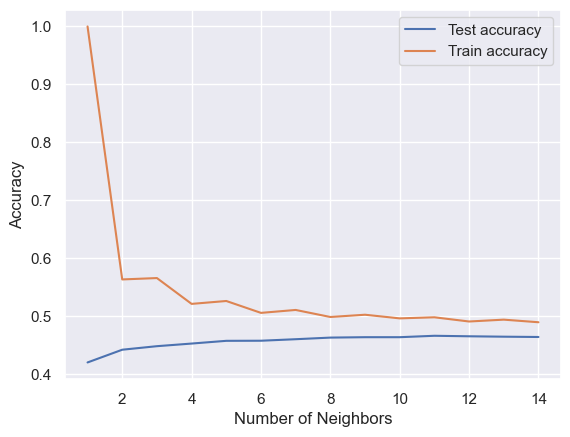

In [84]:
# Plot the relationship between number of neighbors and accuracy

plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig("ML1 1.4 - Testing vs Accuracy_15KNN.png")
plt.show

###### INTERPRETATION: When looking at the KNN only using 15 nearest neighbors we can see that the testing accuracy is slowly rising from about 42% upward to about 46%. It's a slow build but stabilizes. The training accuracy immediately plummets from 100% to about 57%. There's a slow continuous downward trend before the training levels out around 48%. This indicates that the more neighbor introduced into the algorithms the more inaccurate it becomes. Let's look at the confusion matrices

#### Confusion matrix Second Attempt

In [94]:
locations = list({x.split("_")[0] for x in climatewins_clean.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'STOCKHOLM',
 'VALENTIA']

IndexError: list index out of range

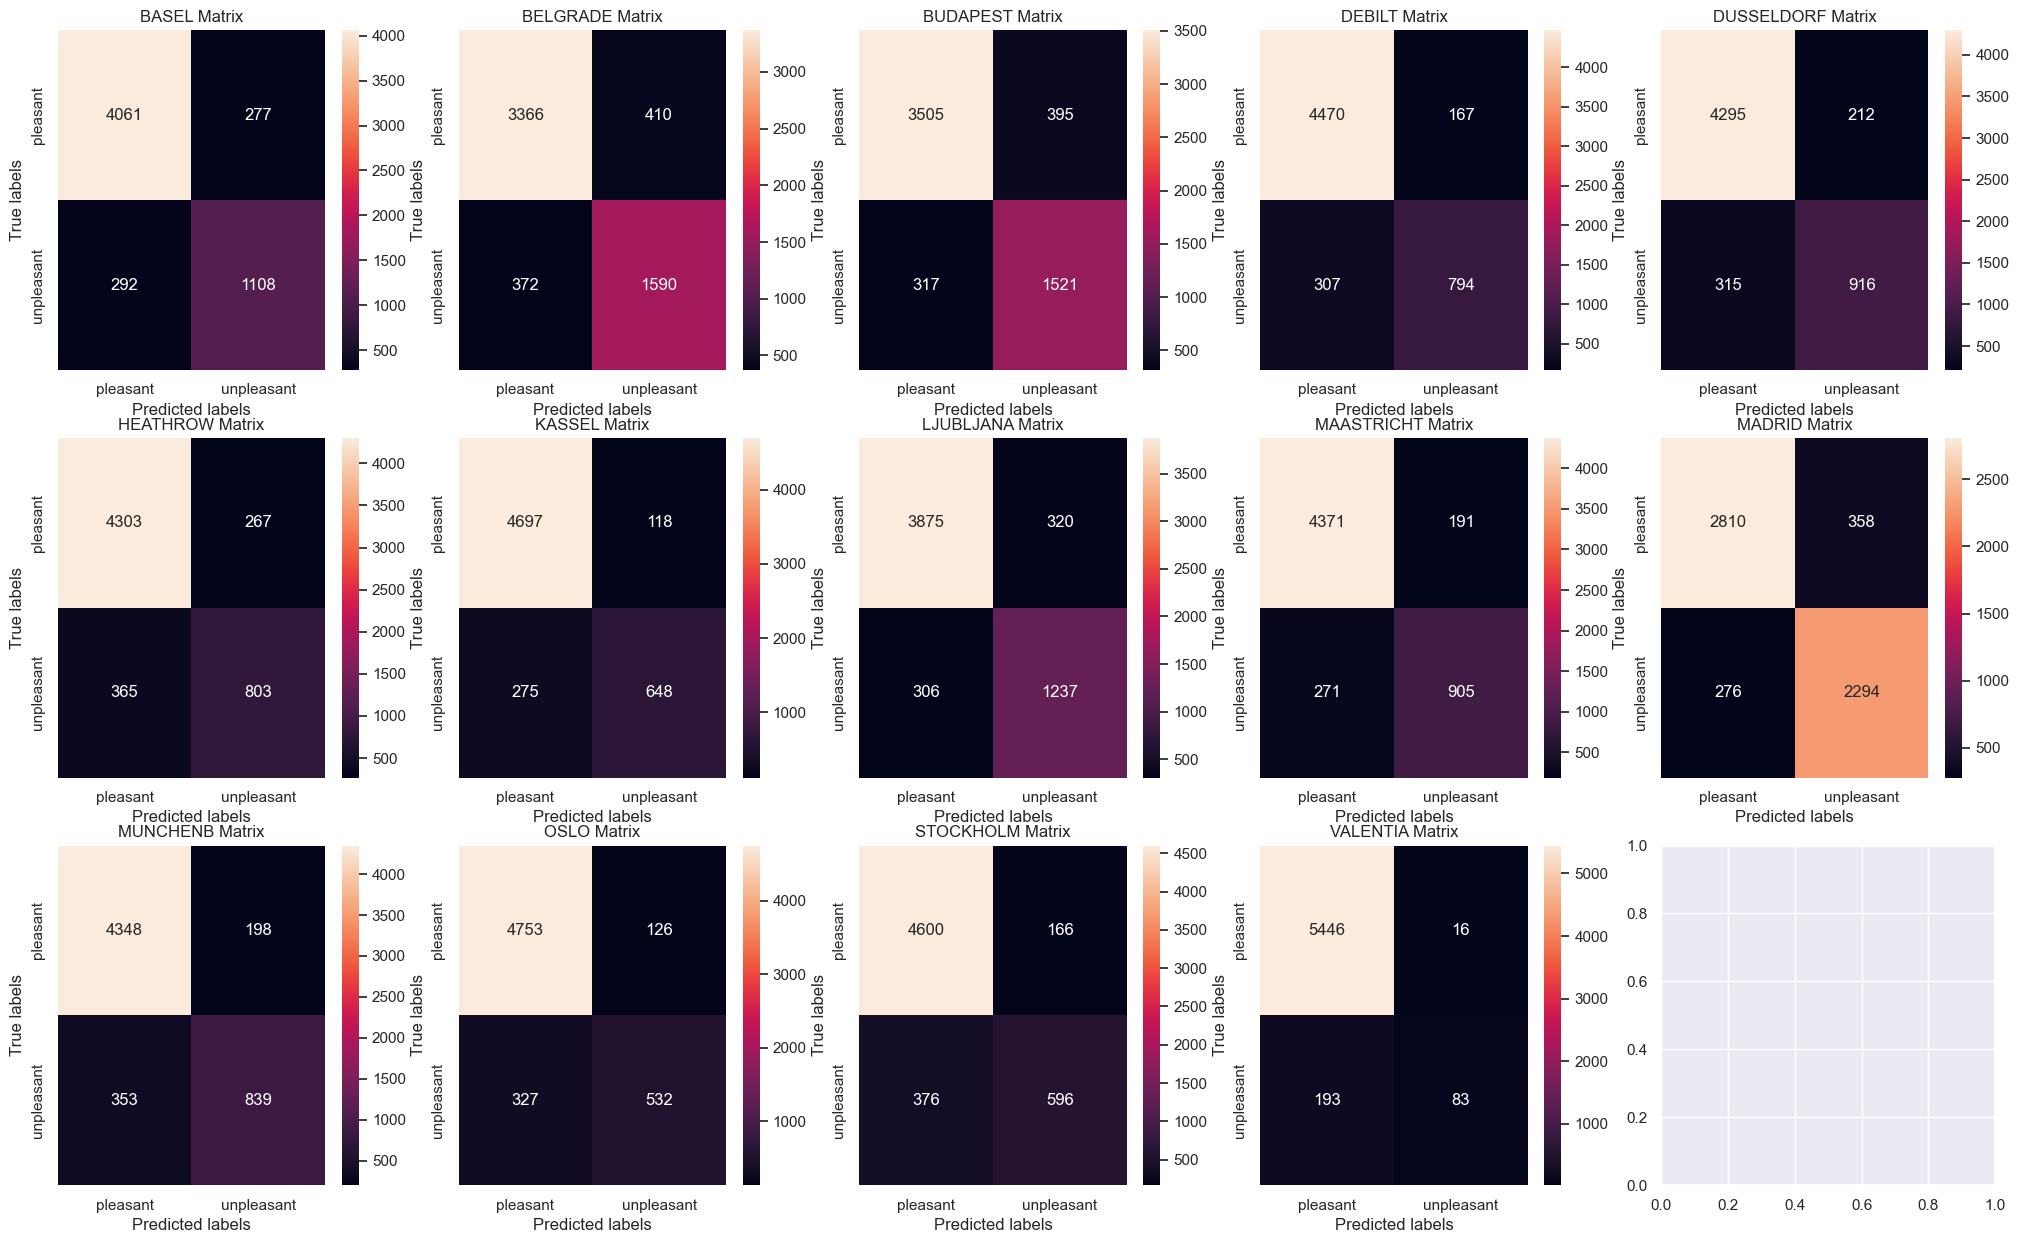

In [96]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        ax[i,j].xaxis.set_ticklabels(labels);
        ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.4 - Confusion Matrix_15KNN.png")

###### INTERPRETATION: The confusion matrices for the 14 weather stations we are observing identify more days with pleasant weather than unpleasant weather. However, we have now reduce the average of pleasant days to 67% increased our average of unpleasant weather by 16% leaving about 8% of incorrectly labeled days. There has been improvement to the incorrect labels in the confusion matrices. This new nearest neighbor has increased Valentia and Debilts pleasant weather percentages The top 5 areas that have the most pleasant weather are Valentia at 96%, Oslo at 82%, Kassel at 81%, Stockholm at 80% and Debilt at 77%.

### 5. K-Nearest Neighbor Third Attempt

In [102]:
# Creating another KNN with 25 neighbors

k_range = np.arange(1,25)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
i - 1
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
i - 2
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
i - 3
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
i - 4
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
i - 5
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
i - 6
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
i - 7
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
i - 8
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
i - 9
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
i - 10
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
i - 11
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 

<function matplotlib.pyplot.show(close=None, block=None)>

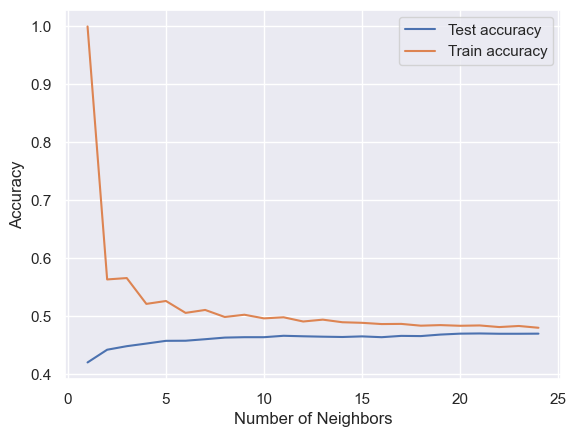

In [104]:
# Plot the relationship between number of neighbors and accuracy

plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig("ML1 1.4 - Testing vs Accuracy_25KNN.png")
plt.show

###### INTERPRETATION: When looking at the KNN only using 25 nearest neighbors we can see that the testing accuracy is slowly rising form about 42% upward to about 47%. At this point we can see that the testing accuracy no longer climbs and is stable at about 47%. The training accuracy immediately plummets from 100% to about 57%. There's a slow continuous downward trend before the training levels out around 52%. This indicates that the more neighbor introduced into the algorithms the more inaccurate it becomes. Let's look at the confusion matrices.

#### Confusion matrix Third Attempt

In [117]:
locations = list({x.split("_")[0] for x in climatewins_clean.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'STOCKHOLM',
 'VALENTIA']

IndexError: list index out of range

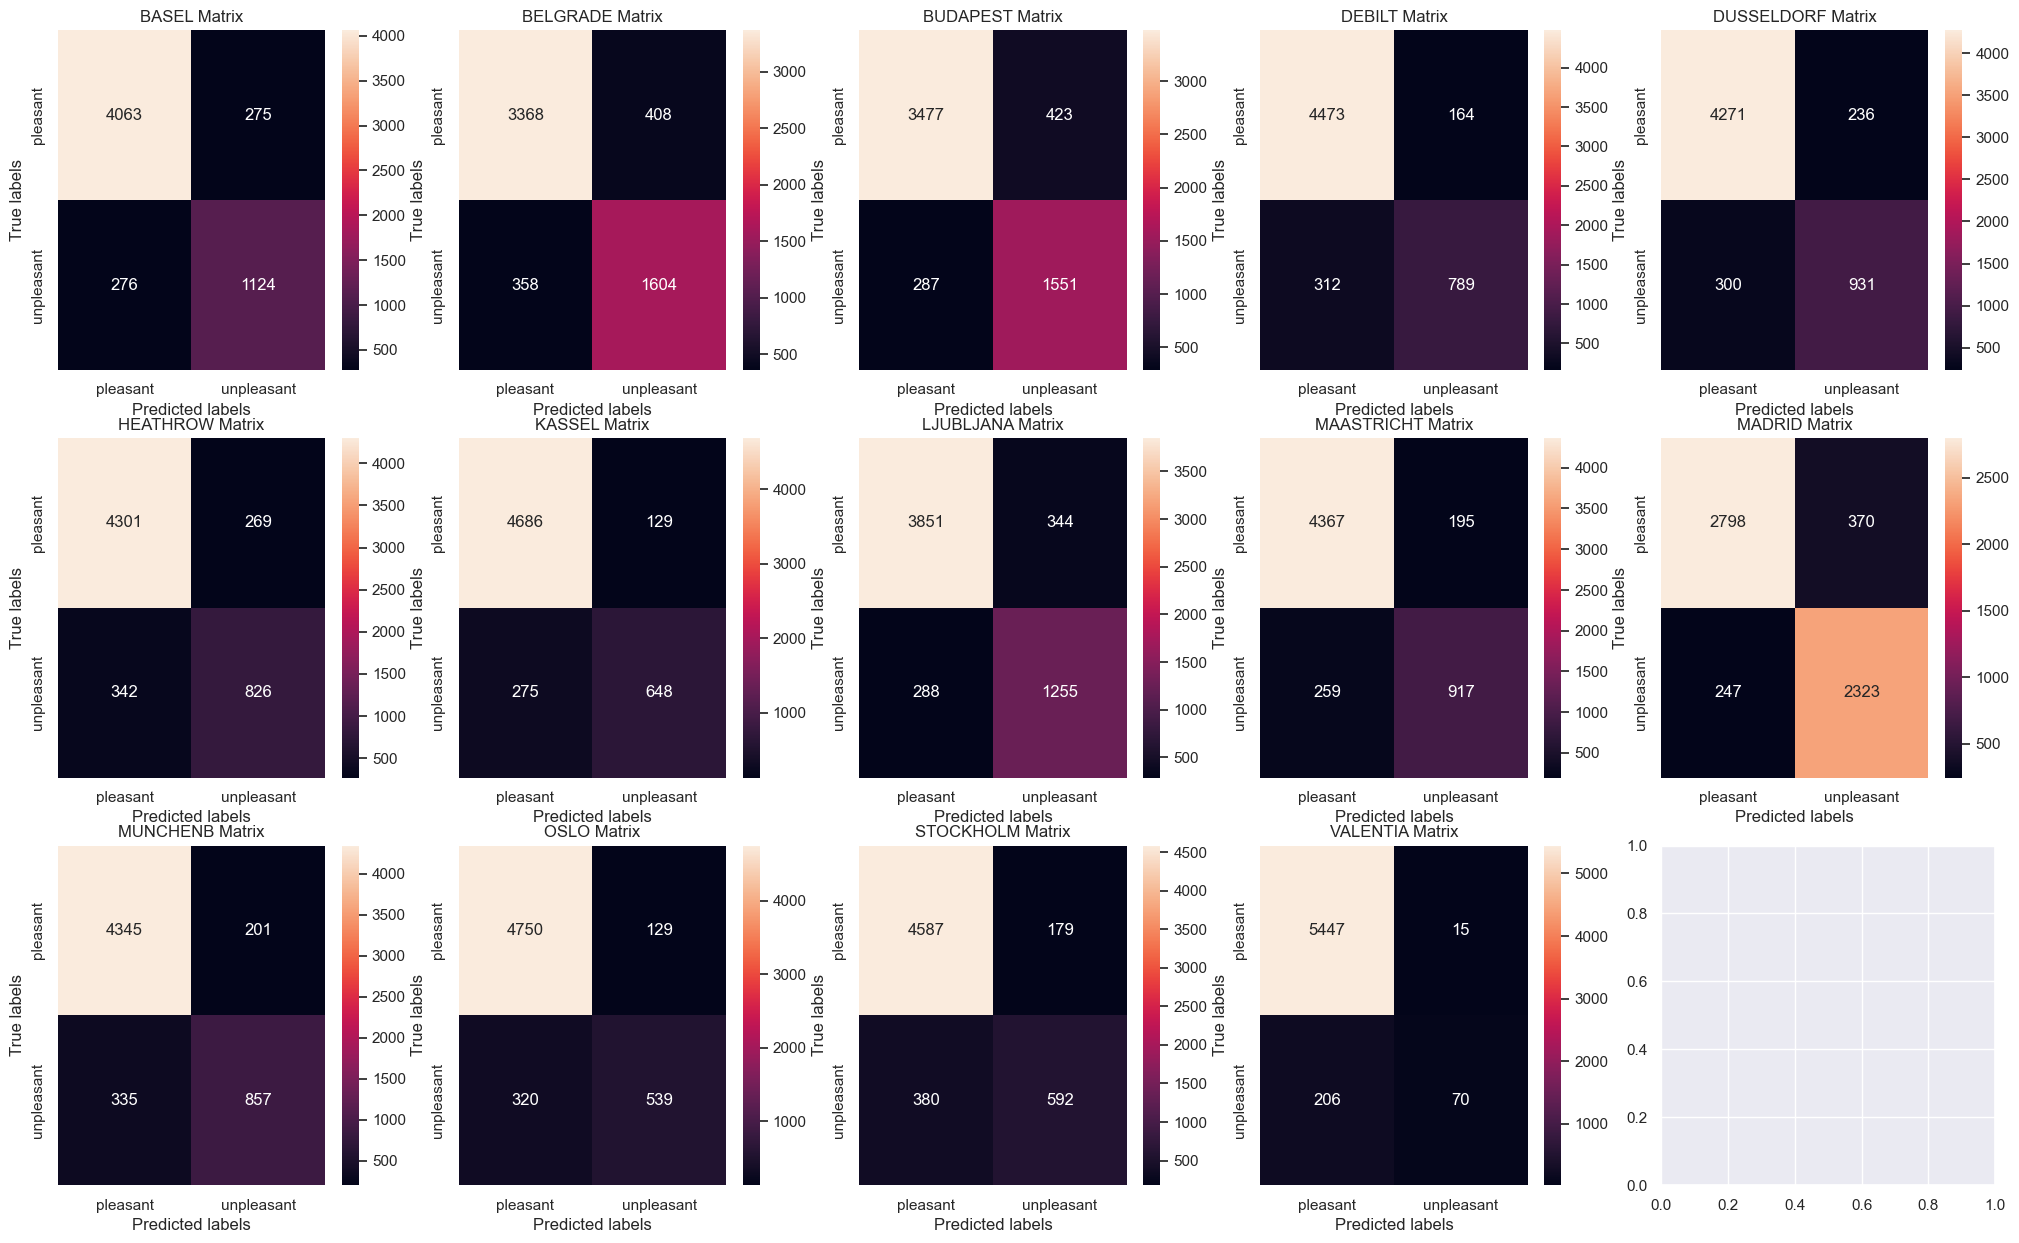

In [121]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        ax[i,j].xaxis.set_ticklabels(labels);
        ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.4 - Confusion Matrix_25KNN.png")

###### INTERPRETATION: The confusion matrices for the 14 weather stations we are observing identify more days with pleasant weather than unpleasant weather. However, we have now improved the average of pleasant days to 72%, maintained our average of unpleasant weather at 16%, and maintained 8% of incorrectly labeled days. This new nearest neighbor has decreased Valentia and Stockholm pleasant weather percentages. The top 5 areas that have the most pleasant weather continue to be Valentia at 94%, Oslo at 82%, Kassel at 81%, Stockholm at 79% and Debilt at 77%. 
###### We will run one more Train/Test with 3KNN to see if there is a difference between the increased KNN.

### 6. K-Nearest Neighbor Fourth Attempt

In [133]:
# Creating another KNN with 3 neighbors

k_range = np.arange(1,3)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2]
i - 1
k - [1 2]


<function matplotlib.pyplot.show(close=None, block=None)>

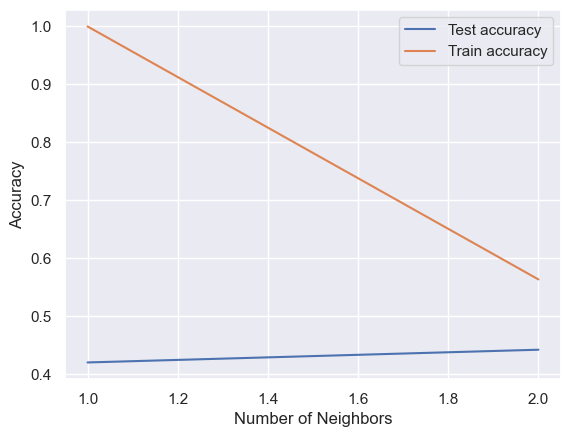

In [135]:
# Plot the relationship between number of neighbors and accuracy

plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig("ML1 1.4 - Testing vs Accuracy_3KNN.png")
plt.show

###### INTERPRETATION: When looking at the KNN only using 3 nearest neighbors we can see that the testing accuracy is slowly rising form about 42% upward to about 45%. The training accuracy immediately plummets from 100% to about 57%. There appears to be a continuous downward trend. From the previous tests we know that this training accuracy continues to plummet.

#### Confusion matrix Fourth Attempt

In [138]:
locations = list({x.split("_")[0] for x in climatewins_clean.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'STOCKHOLM',
 'VALENTIA']

IndexError: list index out of range

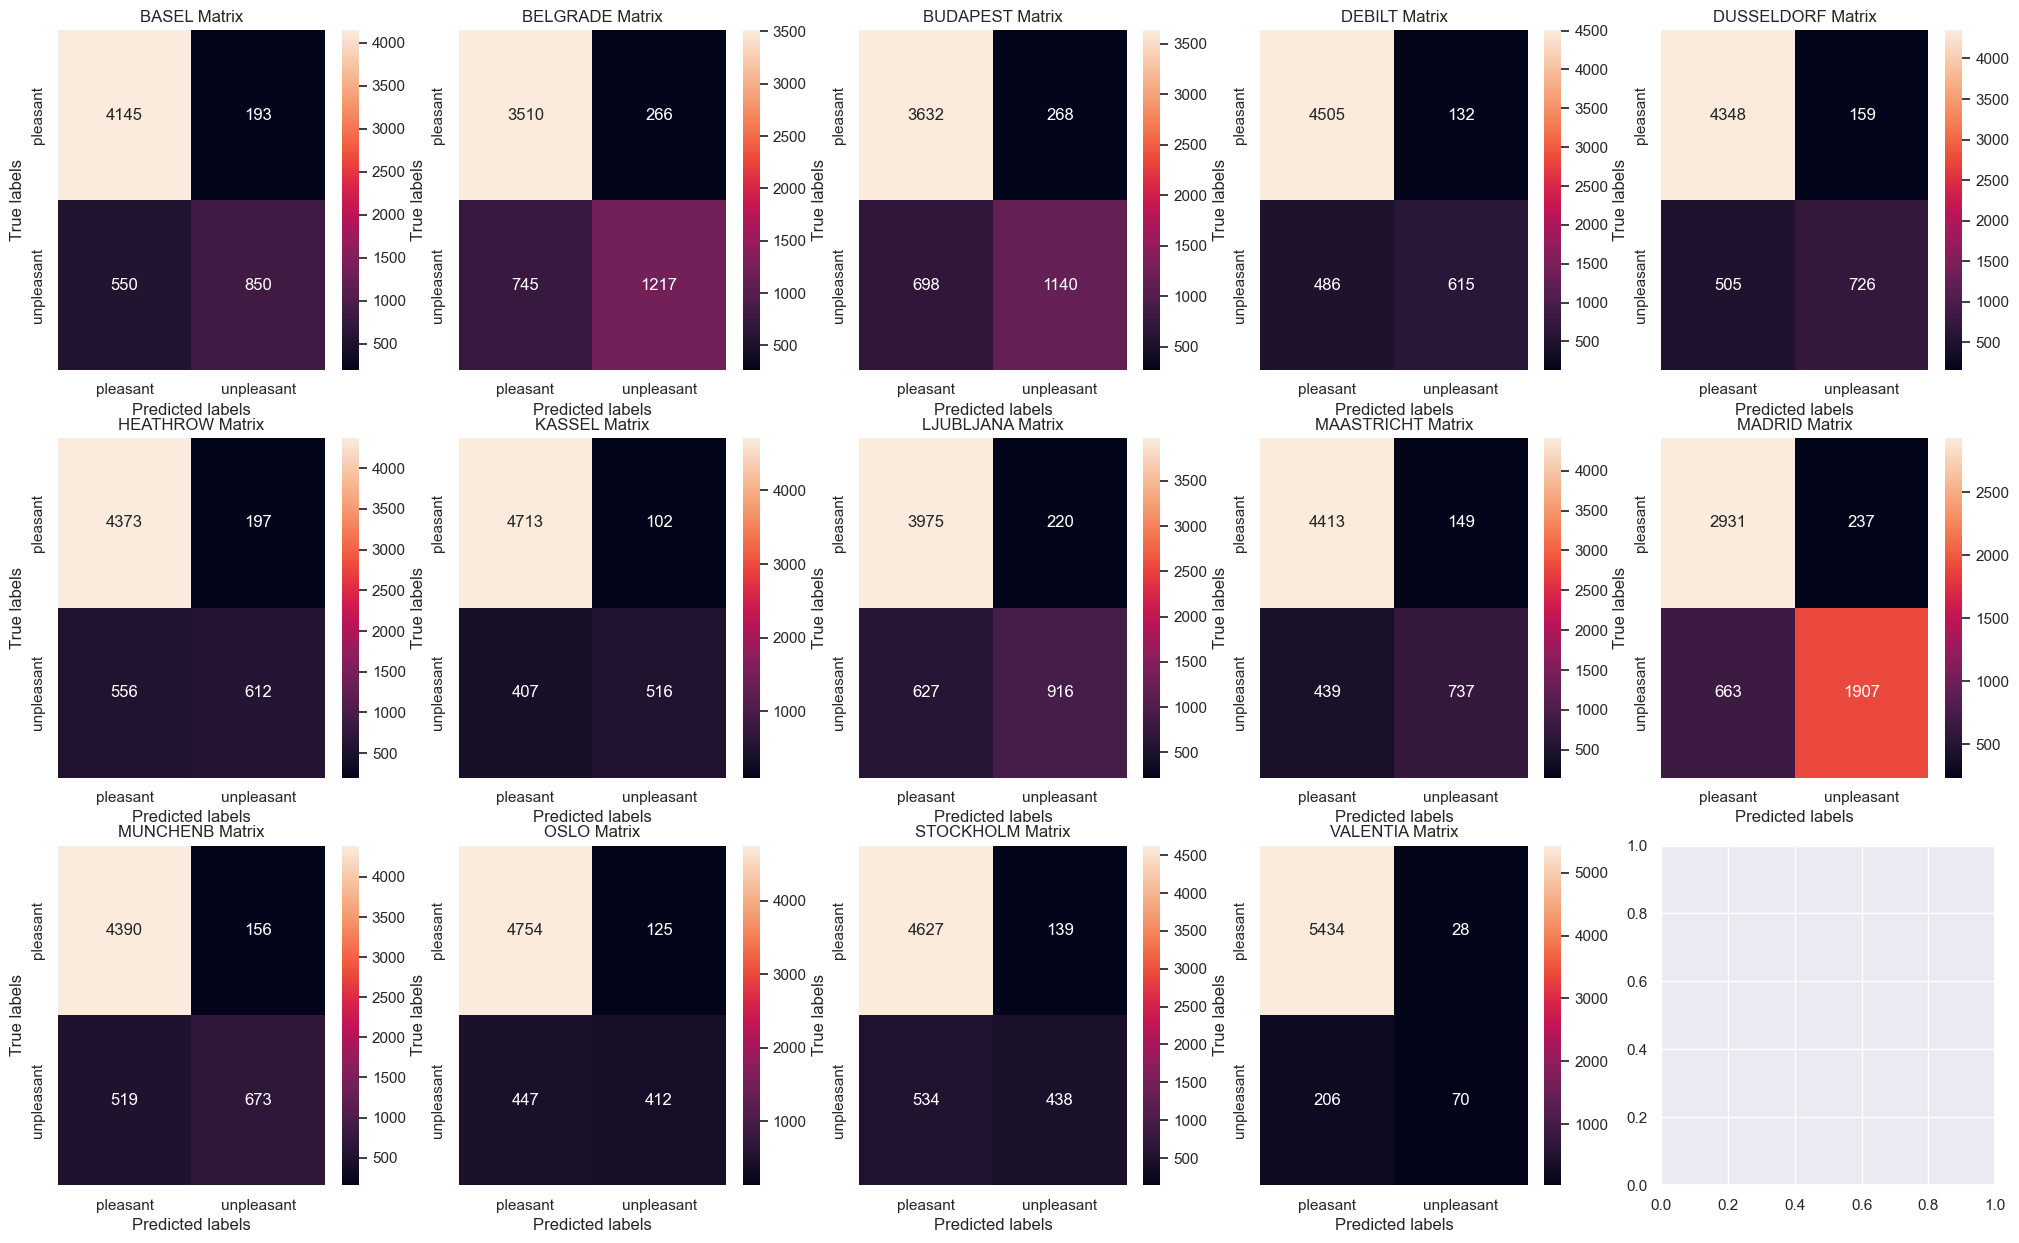

In [142]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        ax[i,j].xaxis.set_ticklabels(labels);
        ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.4 - Confusion Matrix_3KNN.png")

###### INTERPRETATION: The confusion matrices for the 14 weather stations we are observing identify more days with pleasant weather than unpleasant weather. Using our 30% testing data I concluded that there's a 68% average of pleasant weather and an average of 12% unpleasant weather leaving about 10% of incorrectly labeled days. The top 5 areas that have the most pleasant weather are Valentia at 94%, Oslo at 82%, Kassel at 82%, Stockholm at 80% and Debilt at 78%. Only using 3KNN still gives us fairly accurate percentages of pleasant vs unpleasant weather. Our unlabeled percent increases to 10% vs 8% but we are still able to determine which area have the nicest weather the majority of the time.
###### When addressing overfitting, it's hard to state if it's actually happening or not. There are many incorrectly label values incorporated into the confuion matrices. There are somethings the algorithm is missing leading me to believe that the KNN isn't overfitting but possibly underfitting some of the data.

### 7. Export

In [155]:
climatewins_clean.to_pickle(os.path.join(path, 'ClimateWins', 'Prepared Python Files', 'ML1 1.4_scaled_deepdive.pkl'))